Q3.1

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
#from sklearn import tree

In [3]:
header_file = 'data/spambase.names'
category = []
with open(header_file, 'r') as file:
    for row in file:
        row = row.strip()  
        if row and not row.startswith('1,0'):  
            category.append(row.split(':')[0])  
#append spam
category.append('spam')
print(f"Extracted {len(category)} columns:")
print(category)

Extracted 88 columns:
['| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)', '|', '| 48 continuous real [0,100] attributes of type word_freq_WORD', '| = percentage of words in the e-mail that match WORD,', '| i.e. 100 * (number of times the WORD appears in the e-mail) /', '| total number of words in e-mail.  A "word" in this case is any', '| string of alphanumeric characters bounded by non-alphanumeric', '| characters or end-of-string.', '|', '| 6 continuous real [0,100] attributes of type char_freq_CHAR', '| = percentage of characters in the e-mail that match CHAR,', '| i.e. 100 * (number of CHAR occurences) / total characters in e-mail', '|', '| 1 continuous real [1,...] attribute of type capital_run_length_average', '| = average length of uninterrupted sequences of capital letters', '|', '| 1 continuous integer [1,...] attribute of type capital_run_length_longest', '| = length of longest uninterrupted sequence of capital letters', '|', '| 1 continuous integer [1,...] attribute of 

In [4]:
category = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 
    'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 
    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 
    'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 
    'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 
    'capital_run_length_total', 'spam'
]

In [5]:
# load the dataset
data = pd.read_csv('data/spambase.data', header=None)
data.columns = category
data.fillna(0, inplace=True)
X = data.drop('spam', axis=1)  
y = data['spam']             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

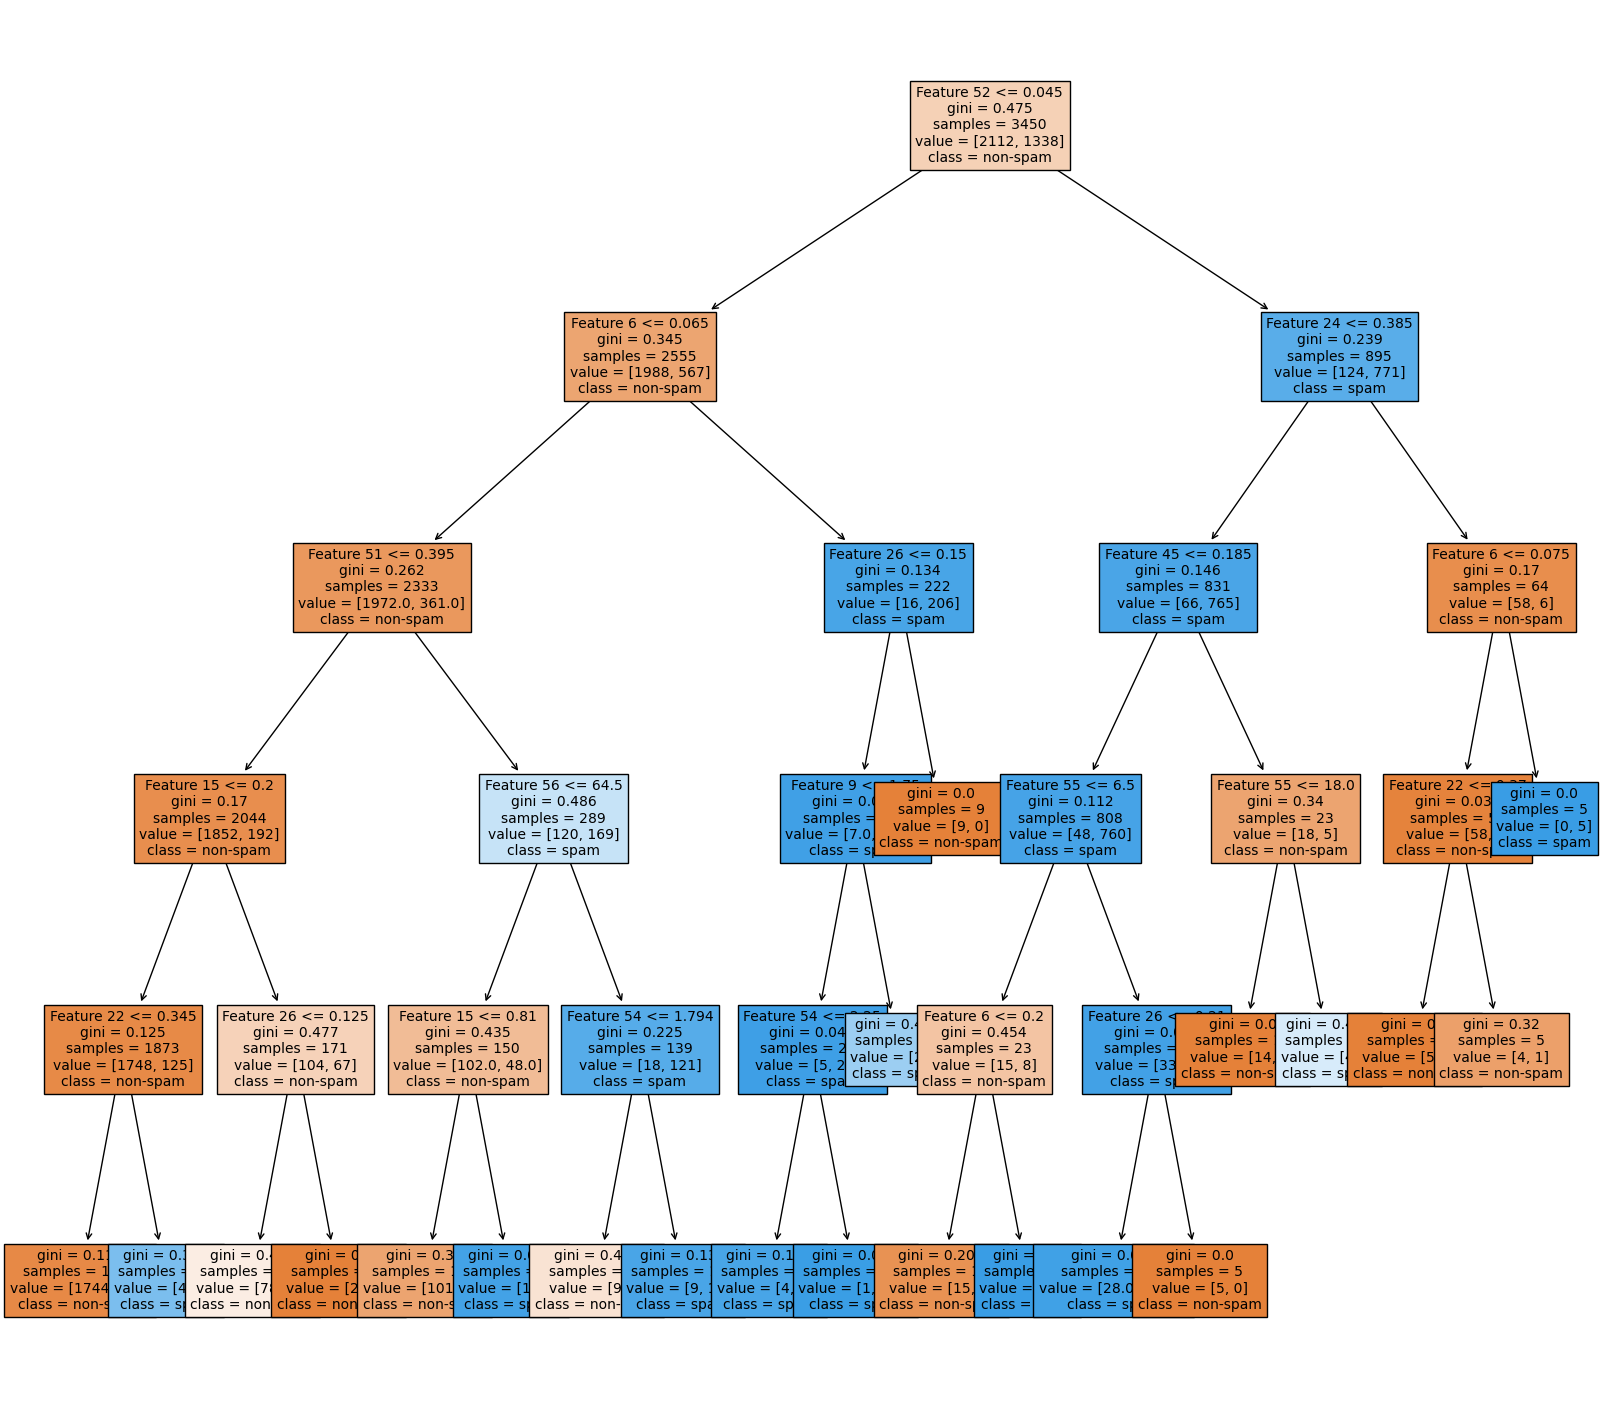

In [6]:
# build cart model and plot the tree
# https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/1.5/modules/tree.html
# during the plot process, I limited the max depth, and split only when there are enough sampples, and each node contains at least 5 samples to help reduce the overfitting and siplify the model
cart = DecisionTreeClassifier(random_state=42, 
                                   max_depth=5,         
                                   min_samples_split=10,
                                   min_samples_leaf=5)  
cart.fit(X_train, y_train)

plt.figure(figsize=(20, 18)) 
plot_tree(cart, filled=True, feature_names=[f"Feature {i}" for i in range(X.shape[1])], 
          class_names=['non-spam', 'spam'], fontsize=10)
plt.savefig('Q3.1.cart.png', bbox_inches='tight')
plt.show()

Q3.2

In [8]:
# cart test error
cart = DecisionTreeClassifier(random_state=42)
cart = cart.fit(X_train, y_train)
cart_pred = cart.predict(X_test)
cart_test_error = np.mean(cart_pred != y_test)
print(f"CART test error is {cart_test_error}")

CART test error is 0.08514335360556038


In [9]:
# rf test error
rf_test_errors = []
for n_trees in range(1, 101):  
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf = rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_test_error = np.mean(rf_pred != y_test)
    rf_test_errors.append(rf_test_error)
print(f"RF test error is {rf_test_error}")

RF test error is 0.04170286707211121


In [10]:
# print the model with lower error
if cart_test_error > rf_test_error:
    print(f'Random Forest has lower test error: {rf_test_error}')
else:
    print(f'CART has lower test error: {cart_test_error}')

Random Forest has lower test error: 0.04170286707211121


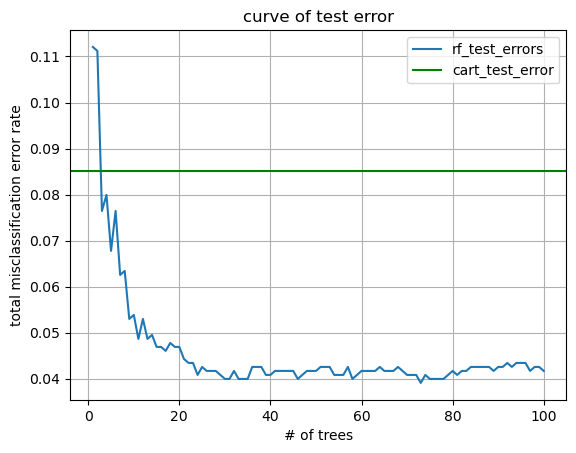

In [11]:
# plot the curve of test error (total misclassification error rate vs number of trees)
plt.plot(range(1, 101), rf_test_errors, label='rf_test_errors')
plt.axhline(y=cart_test_error, color='green', label='cart_test_error')
plt.xlabel('# of trees')
plt.ylabel('total misclassification error rate')
plt.title('curve of test error')
plt.legend()
plt.grid(True)
plt.savefig('Q3.2.curve of test error.png')
plt.show()

Q3.3

In [13]:
v_values = np.arange(1, 58, 1)
oob_error = []
rf_test_error = []


In [14]:
for v in v_values:
    rf = RandomForestClassifier(n_estimators=100, max_features=v, random_state=42, oob_score=True)
    rf.fit(X_train, y_train)
    oob_error.append(1 - rf.oob_score_)
    rf_pred = rf.predict(X_test)
    test_error = np.mean(rf_pred != y_test)
    rf_test_error.append(test_error)

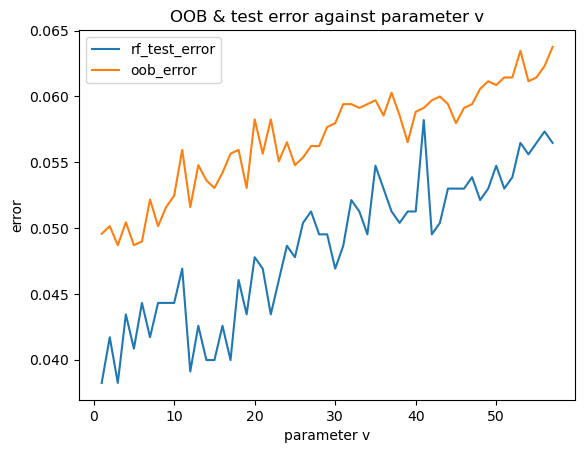

In [15]:
plt.plot(v_values, rf_test_error, label='rf_test_error')
plt.plot(v_values, oob_error, label='oob_error')
plt.xlabel('parameter v')
plt.ylabel('error')
plt.title('OOB & test error against parameter v')
plt.legend()
plt.savefig('Q3.3.OOB & test error against parameter v.png')
plt.show()

Q3.4

In [17]:
#extract non-spam from training data
non_spam_X_train = X_train[(X_train['word_freq_george'] != 0) & (X_train['word_freq_650'] != 0) ]  
#scale the dataset
scaler = StandardScaler()
non_spam_X_train = scaler.fit_transform(non_spam_X_train) 
X_test = scaler.transform(X_test)  
#train date
oc_svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)  
oc_svm = oc_svm.fit(non_spam_X_train)
y_pred = oc_svm.predict(X_test)
y_pred = np.where(y_pred == 1, 0, 1)  
mc_error = np.mean(y_pred != y_test)
print(f'misclassification error rate is {mc_error}')

misclassification error rate is 0.32319721980886185
